In [11]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from numpy import sqrt, pi, exp

T = 5
N = 16
beta_values = np.linspace(0.002, 1.998, 50)  # betaを0.001から0.999まで500段階で設定
logP_N_list = np.linspace(0.008, 0.792, 50)
m0 = 0.750
Nsamp = 50
rng = np.random.RandomState(seed=44)

def f_func(x):
    return np.exp(beta*x)

# 結果を格納するリスト
results = []
for beta in beta_values:
    row_results = []
    if beta == beta_values[5] or beta == beta_values[5]:
        print(beta)
    for logP_N in logP_N_list:
        M = int(exp(logP_N*N))
        if M < 1:
            M = 1

        m_list = []
        
        for nsamp in range(Nsamp):
            xi = np.sign(rng.standard_normal((M,N)))
            xi[0,:] = np.ones((N,))
            
            s= np.ones((N,))
            s[int((1+m0)/2*N):] *= (-1)
            m=s*xi[0,:]
            m_exp_list = [m.mean()]
            h= np.zeros((M,))
            for t in range(1,T):
                #h = np.sum(xi.T*f_func(xi@s),axis=1)
                h = f_func(xi@s)@xi
                s = np.sign(h)
                m = s * xi[0,:]
                m_exp_list.append(m.mean())

            m_list.append(m_exp_list)

        m_list = np.array(m_list)
        m_array = np.array(m_list.mean(axis=0))
        row_results.append(m_array[T - 1])  # T時刻目のmの平均を取得

    results.append(row_results)

# 結果をnumpy配列に変換
results = np.array(results)
print(results)



0.2056734693877551
[[1.     1.     1.     ... 0.4325 0.4875 0.565 ]
 [1.     1.     1.     ... 0.75   0.75   0.75  ]
 [1.     1.     1.     ... 0.75   0.75   0.75  ]
 ...
 [1.     1.     1.     ... 0.75   0.75   0.75  ]
 [1.     1.     1.     ... 0.75   0.75   0.75  ]
 [1.     1.     1.     ... 0.75   0.75   0.75  ]]


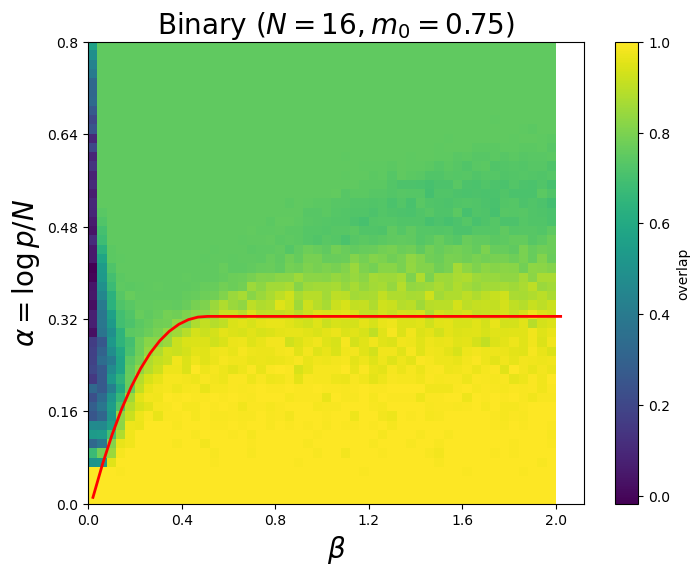

In [14]:
def logP_N_func(beta, m0):
    beta_c = (1/4)*np.log((1+m0)/(1-m0))
    if beta < beta_c:
        return 2*beta*m0 - np.log(np.cosh(2*beta)) 
    else:
        return m0*np.arctanh(m0) + (1/2)*np.log(1-m0**2) 


# ヒートマップのプロット
plt.figure(figsize=(8, 6))
plt.imshow(results.T, aspect='auto', cmap='viridis', origin='lower')
plt.plot(np.linspace(0,50), np.array([logP_N_func(beta, m0)*50/0.8 for beta in beta_values]), color='red', linewidth=2)
plt.colorbar(label='overlap')
plt.yticks(ticks=[-0.5,9.5,19.5,29.5,39.5,49.5], labels=np.linspace(0,0.8,6))
plt.xticks(ticks=[-0.5,9.5,19.5,29.5,39.5,49.5], labels=np.round(np.linspace(0,2,6), 1))
plt.ylabel(r"$\alpha=\log{p}/N$",fontsize=20)
plt.xlabel(r"$\beta$",fontsize=20)
plt.title(rf"Binary ($N={N},m_0={m0}$)",fontsize=20)
plt.show()